<a href="https://colab.research.google.com/github/TysonBiegler/WGU_MSDA_Portfolio/blob/master/D207PA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tyson Biegler
### Student ID: 012170282
### D207 Exploratory Data Analysis



In [29]:
# Initial setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = None #So that I can see all the columns
import statistics
from scipy import stats
import pylab as pl
import statsmodels.api as sm
import seaborn as sns

In [30]:
# importing csv
df = pd.read_csv('/content/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [32]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

# A
### 1. Research question
I want to discover "which independant variables contribute to churn."
### 2. Benefits of analysis
In the telecom industry, or any service industry for that matter, customers are the business. Customer service is essential to a thriving business.

The data dictionary mentions that some telecom companies can experience a 25% churn rate, and therefore, investigating the factors that contribute to customer churn is of utmost importance. If stakeholders knew precisely which factors contributed to churn, based on statistical analysis, they would have data-driven insights that would enable them to make meaningful changes for their customers. Some of these insights could lead to adjusting pricing, offering incentives based on tenure, increase training in customer interactions, focus more or less on different demographics and so on.

### 3. Identification of the data
Because we will be investigating which factors impact customer churn, the dependant variable will be 'Churn.' 'Churn' is a categorical variable that consists of 'Yes' and 'No' values.





In [39]:
#renaming the survey responses to be more intuitive
df.rename(columns={'Item1':'Timely_response',
                   'Item2':'Timely_fixes',
                   'Item3':'Timely_replacements',
                   'Item4':'Reliability',
                   'Item5':'Options',
                   'Item6':'Respectful',
                   'Item7':'Courteous',
                   'Item8':'Active_listening'
                   },
          inplace=True)
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_response', 'Timely_fixes',
       'Timely_replacements', 'Reliability', 'Options', 'Respectful',
       'Courteous', 'Active_listening'],
      dtype='object')

In [6]:
# T-test in python

#sample data witha population size of 7
N = 7
a = (17,20,25,18,31,19,35)
b = (26,18,32,25,21,20,40)

# calculating the standard deviation
#calculate the variance to get the standard deviation
# for unbiased max liklihood estimate we have to divede the var by N-1
var_a = statistics.variance(a) #calculating variance to get std dev
var_b = statistics.variance(b)
s = np.sqrt((var_a + var_b)/2)#standard deviation

print('The mean of a is: ', statistics.mean(a))
print('The mean of b is: ', statistics.mean(b))


# calculate the t statistic
t = (statistics.mean(a) - statistics.mean(b)) / (s * np.sqrt(2/N))

# compare with the critical t-value
#degrees of freedom
df = (2*N) - 2

#p-value after comparison with the t
p = 1 - stats.t.cdf(t, df=df)

print("t = " + str(t))
print("p = " + str(2 * p))

# you can see that after comparing the t statistic with the critical t value (computed internally)
# cross checking with the internal scipy function

# t2, p2 = stats.ttest_ind(a, b)
# print("t = " + str(t2))
# print("p = " + str(p2))



The mean of a is:  23.571428571428573
The mean of b is:  26
t = -0.6155758007212158
p = 1.4503282696916648


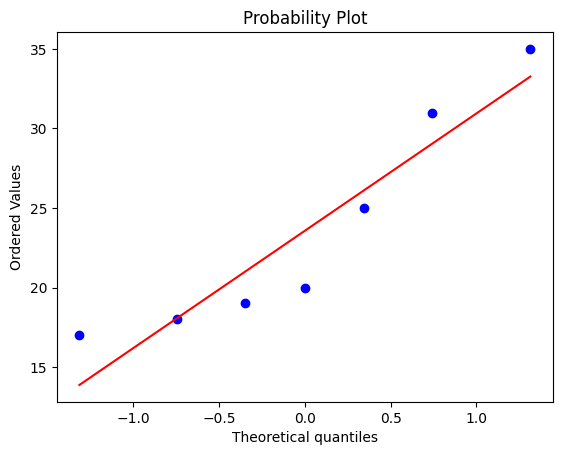

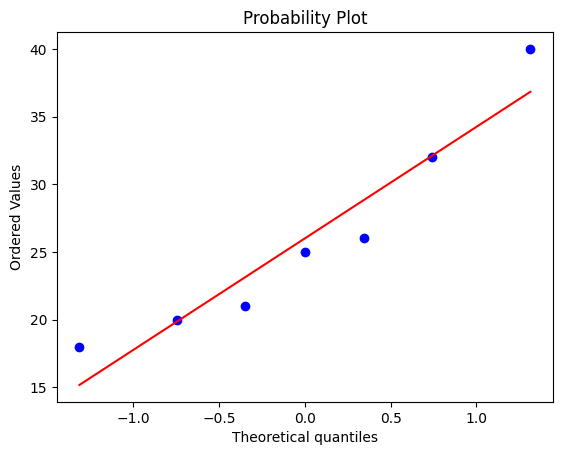

In [11]:
# Q-Q plot in python
a = (17,20,25,18,31,19,35)
b = (26,18,32,25,21,20,40)

stats.probplot(a, dist="norm", plot=pylab)
pylab.show()
stats.probplot(b, dist="norm", plot=pylab)
pylab.show()

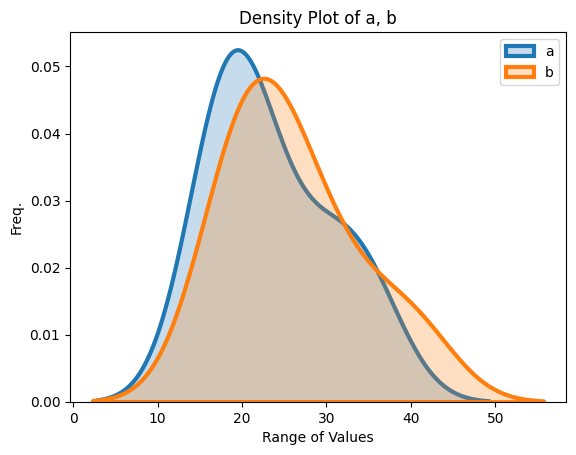

In [18]:
# Density plot in Python
a = (17,20,25,18,31,19,35)
b = (26,18,32,25,21,20,40)

#seaborn histogram
sns.kdeplot(a, fill=True, linewidth=3, label='a')
sns.kdeplot(b, fill=True, linewidth=3, label='b')

#add labels
plt.title('Density Plot of a, b')
plt.xlabel('Range of Values')
plt.ylabel('Freq.')

#add legend
plt.legend(['a', 'b'])

